In [3]:
from __future__ import print_function, division
%matplotlib inline


import os

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [4]:
import numpy as np
#import modisco
#import theano
#print("Theano version:",theano.__version__)
import sys
print (sys.version)

2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]


## Run TF-MoDISco

TF-MoDISco first identifies seqlets, then splits the seqlets into "metaclusters" according to their pattern of activity across all the tasks, and then performs clustering within each task. Since there is just one task, there are only 2 possible metaclusters: +1 for the task and -1 for the task. The -1 metacluster does not turn up any motifs after noise filtering, but the +1 metacluster produces two motifs.

To demonstrate customization, the code below has slight modifications from default settings in the following ways:
- Because the TAL and GATA motifs are relatively short compared to something like CTCF, it uses a sliding window size of 15 (rather than the default of 21) and flanks of 5 (rather than the default of 10). The sliding window size and flanks should be adjusted according to the expected length of the core motif and its flanks. If the window size or flank sizes are too long, you risk picking up more noise.
- During the seqlet clustering, motifs are trimmed to the central `trim_to_window_size` bp with the highest importance. `trim_to_window_size` is set to 10 rather than the default of 30. After the trimming is done, the seqlet is expanded on either side by `initial_flank_to_add`. This is set to 3 rather than the default of 10.
- The `final_min_cluster_size` is set to 60 rather than the default of 30. This is used to filter out small clusters with relatively weak support (in this case, fewer than 50 seqlets).
- It uses kmers of length 5 with 1 gap and no mismatches to compute the "quick and dirty" affinity matrix across all seqlets. The "quick and dirty" affinity matrix is used both for noise filtering and as a first pass to speed up computation of the continuous jaccard affinity matrix (the latter affinities are only computed between seqlets deemed to be close together by the "quick and dirty" method). I made the kmer length smaller to keep memory usage on the GPU down when testing on my macbook pro. The default is to use kmers of length 8 with 3 gaps and 2 mismatches, and this works fine on more modern GPUs than the one in my 4-year-old macbook.

<HDF5 file "results.hdf5" (mode r+)>
9  metaclusters:  ['metacluster0', 'metacluster1', 'metacluster2', 'metacluster3', 'metacluster4', 'metacluster5', 'metacluster6', 'metacluster7', 'metacluster8']
metacluster0
activity pattern: [1 1 1 1 1]
6  patterns:  ['pattern_0', 'pattern_1', 'pattern_2', 'pattern_3', 'pattern_4', 'pattern_5']
pattern_0
total seqlets: 15806
Task 0 actual importance scores:


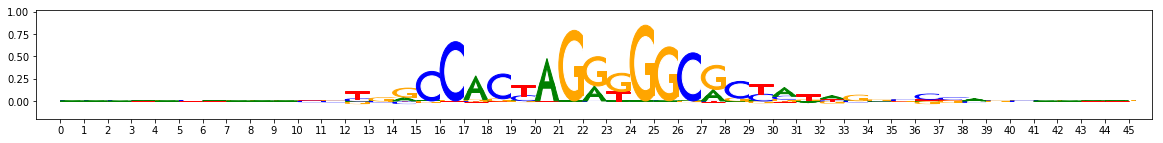

onehot, fwd and rev:


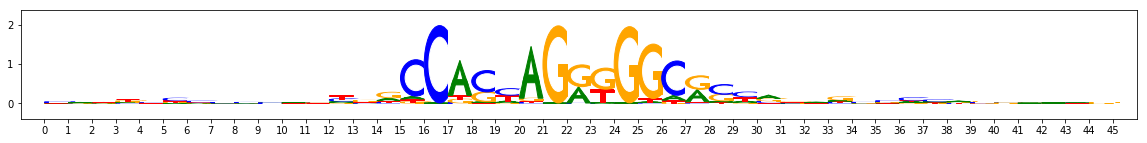

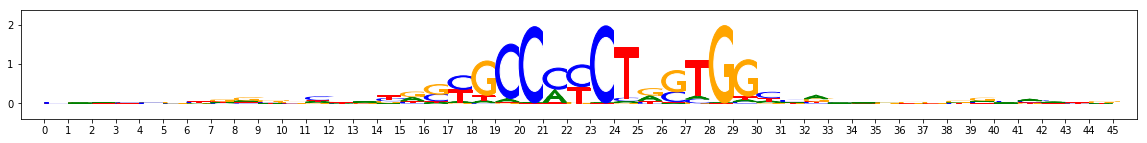

pattern_1
total seqlets: 1187
Task 0 actual importance scores:


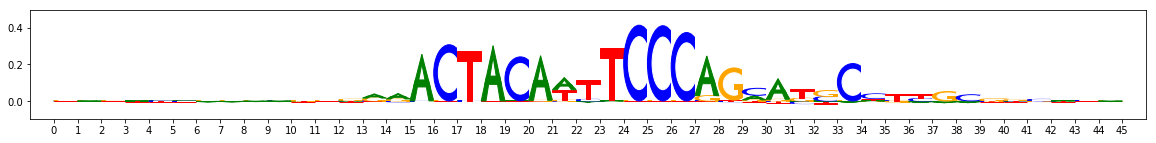

onehot, fwd and rev:


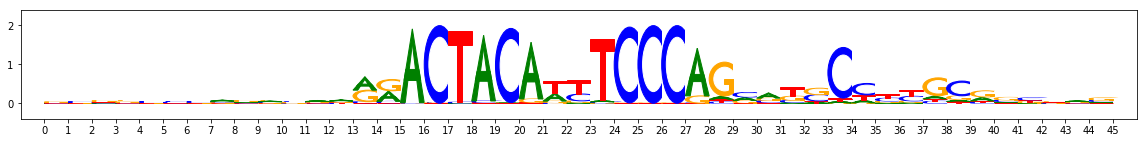

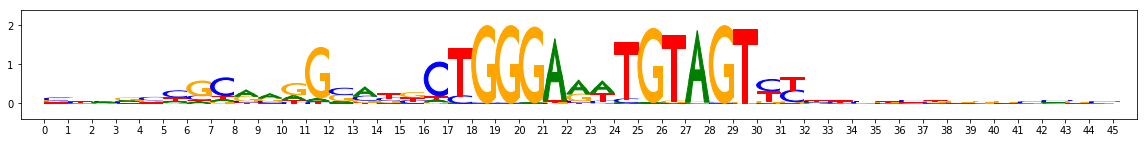

pattern_2
total seqlets: 508
Task 0 actual importance scores:


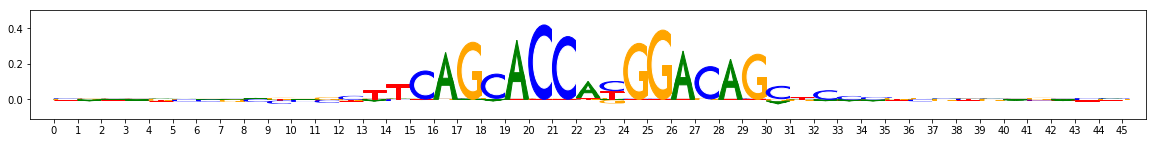

onehot, fwd and rev:


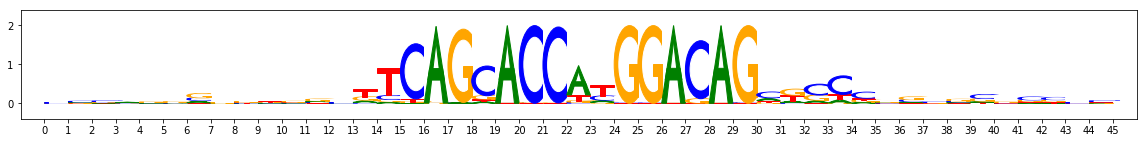

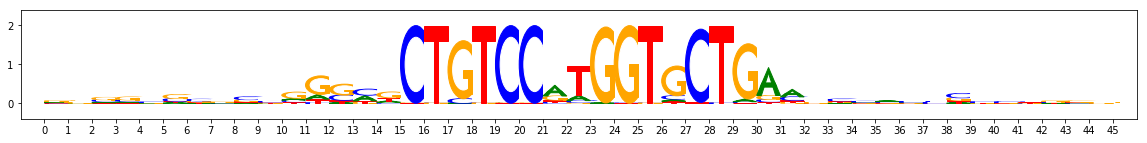

pattern_3
total seqlets: 124
Task 0 actual importance scores:


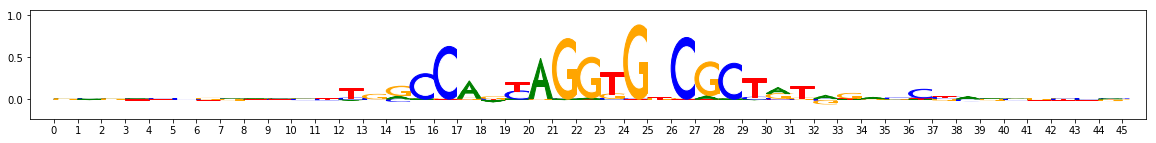

onehot, fwd and rev:


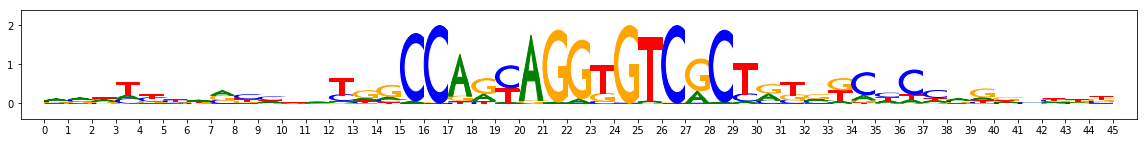

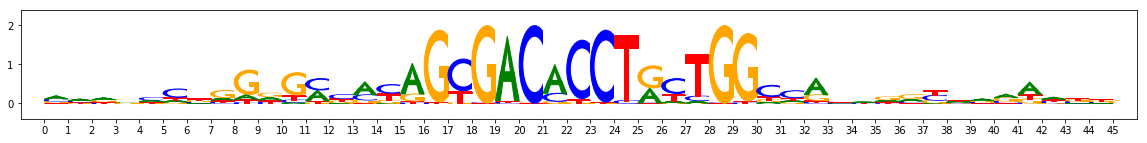

pattern_4
total seqlets: 117
Task 0 actual importance scores:


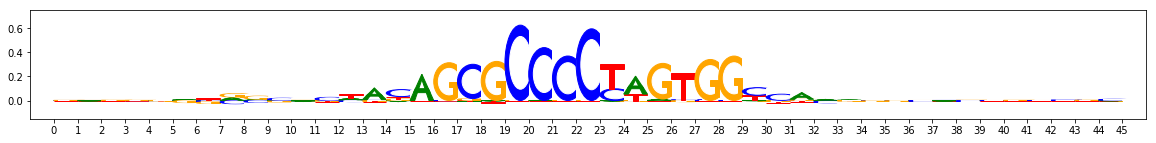

onehot, fwd and rev:


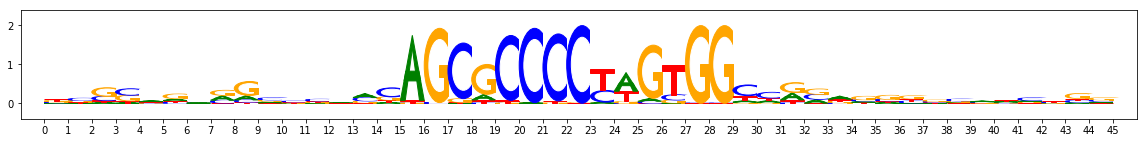

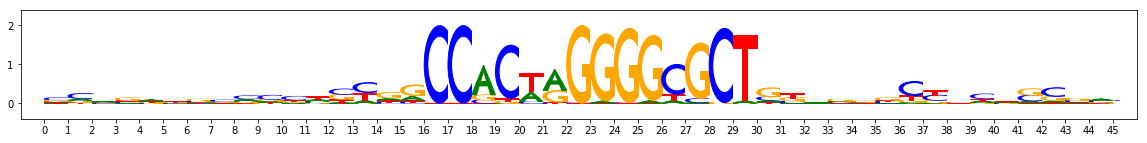

pattern_5
total seqlets: 68
Task 0 actual importance scores:


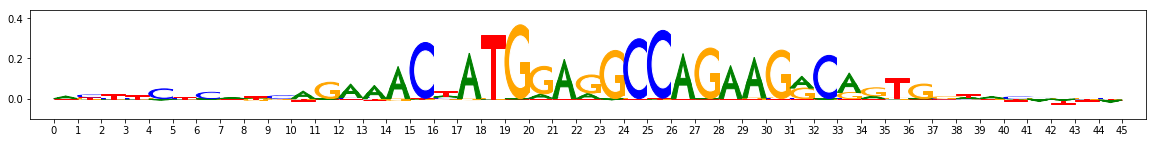

onehot, fwd and rev:


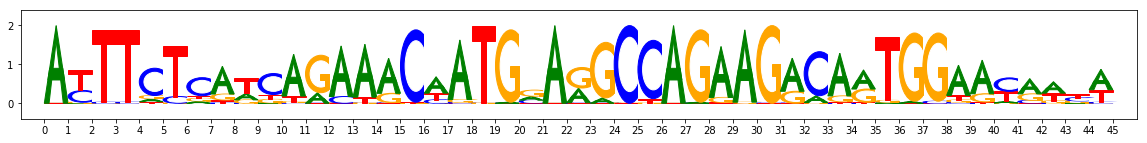

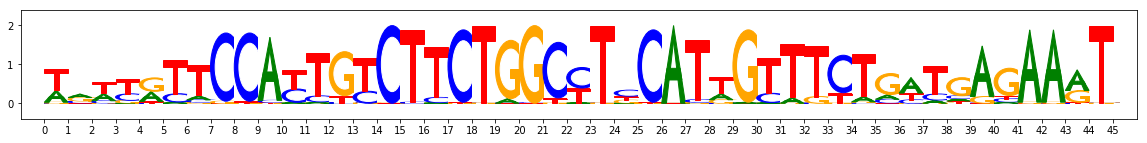

metacluster1
activity pattern: [ 0  0  0 -1  0]
6  patterns:  ['pattern_0', 'pattern_1', 'pattern_2', 'pattern_3', 'pattern_4', 'pattern_5']
pattern_0
total seqlets: 639
Task 0 actual importance scores:


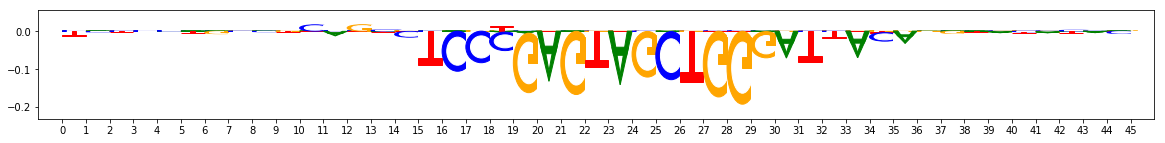

onehot, fwd and rev:


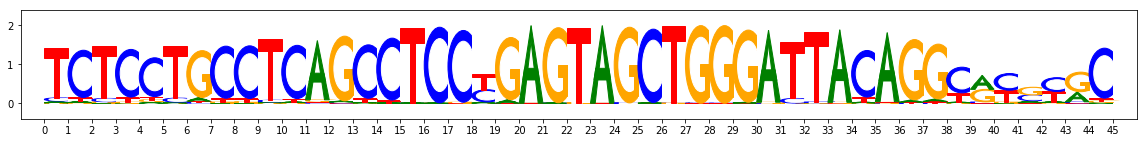

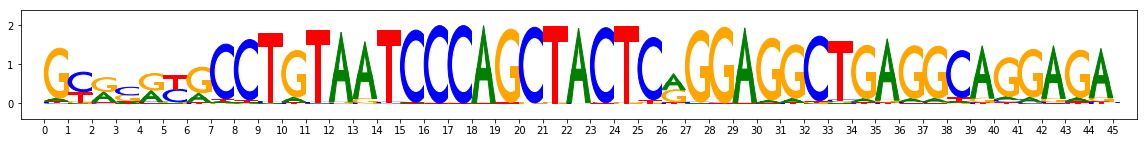

pattern_1
total seqlets: 473
Task 0 actual importance scores:


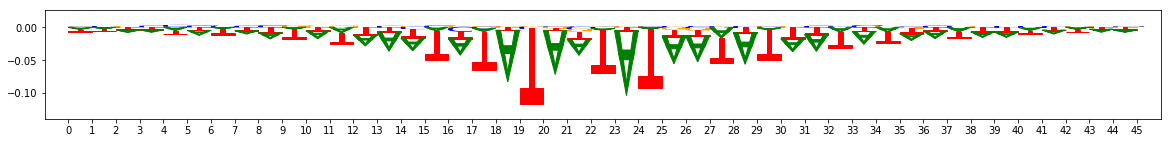

onehot, fwd and rev:


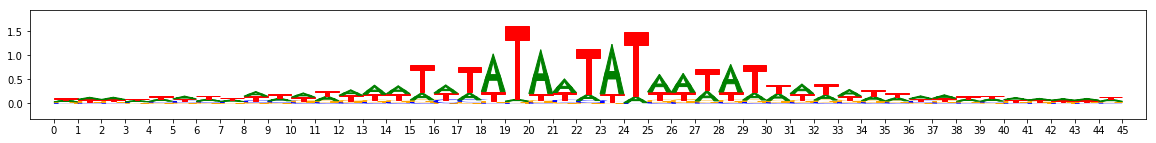

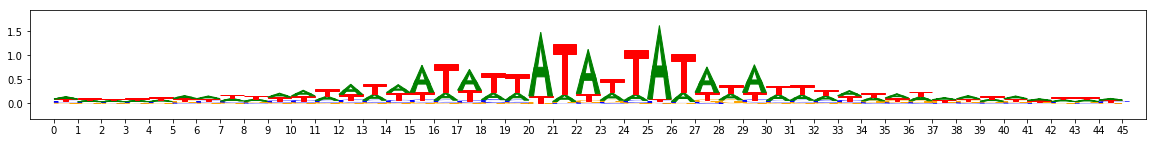

pattern_2
total seqlets: 439
Task 0 actual importance scores:


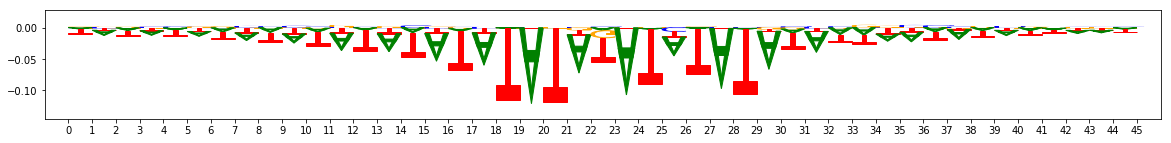

onehot, fwd and rev:


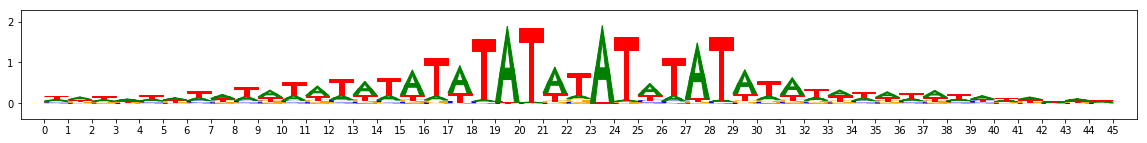

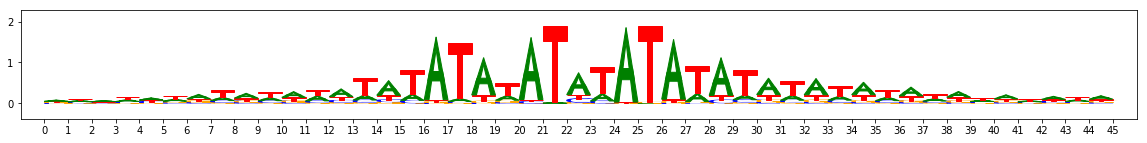

pattern_3
total seqlets: 245
Task 0 actual importance scores:


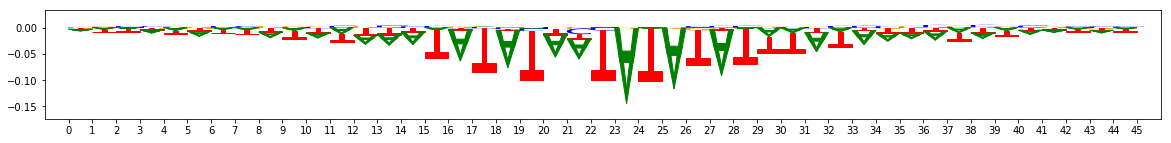

onehot, fwd and rev:


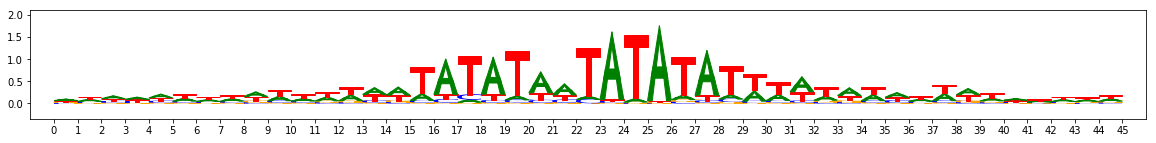

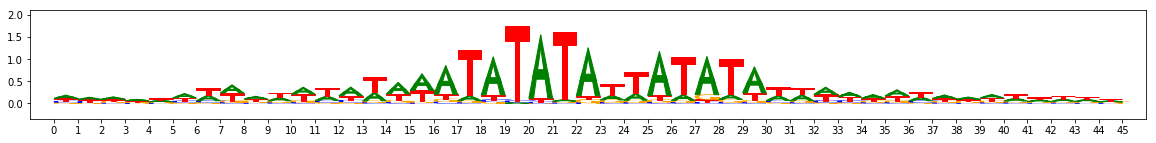

pattern_4
total seqlets: 115
Task 0 actual importance scores:


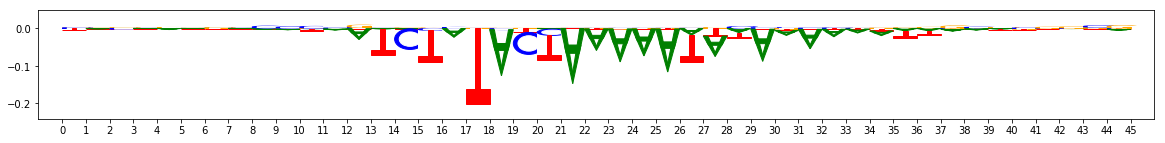

onehot, fwd and rev:


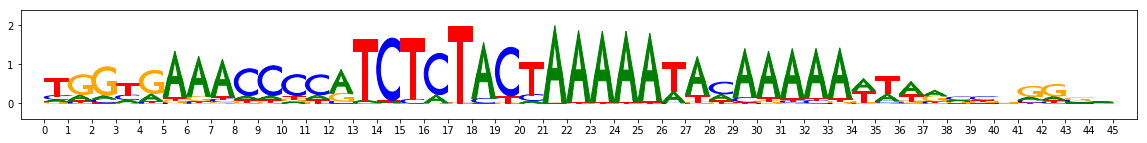

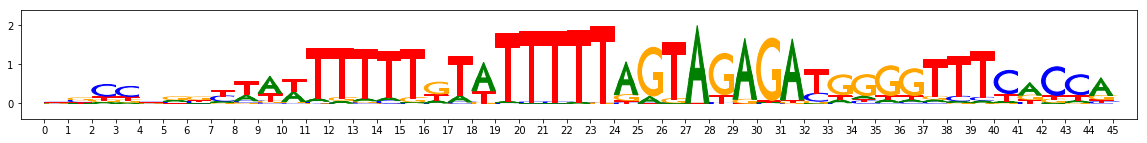

pattern_5
total seqlets: 105
Task 0 actual importance scores:


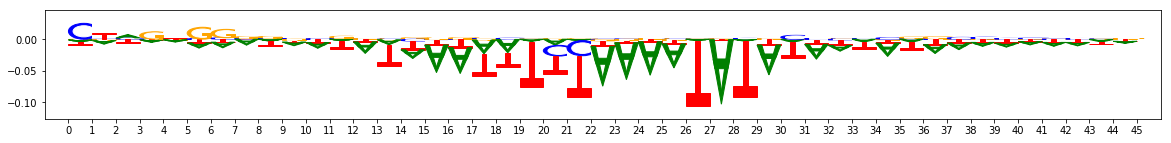

onehot, fwd and rev:


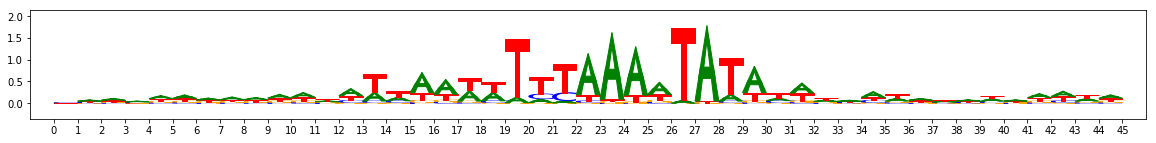

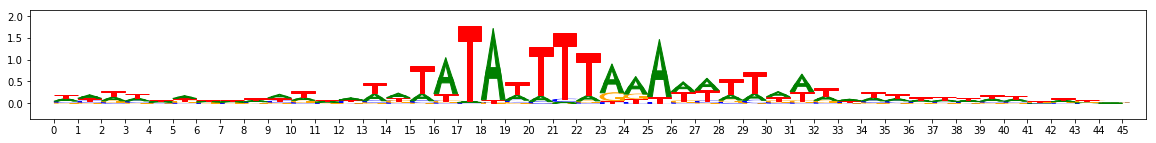

metacluster2
activity pattern: [1 1 1 0 1]
4  patterns:  ['pattern_0', 'pattern_1', 'pattern_2', 'pattern_3']
pattern_0
total seqlets: 1776
Task 0 actual importance scores:


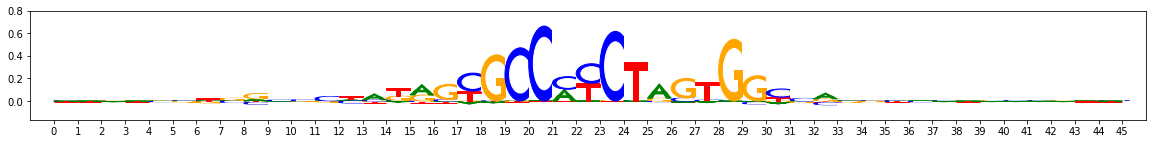

onehot, fwd and rev:


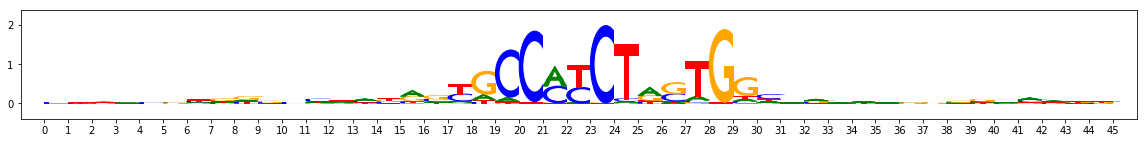

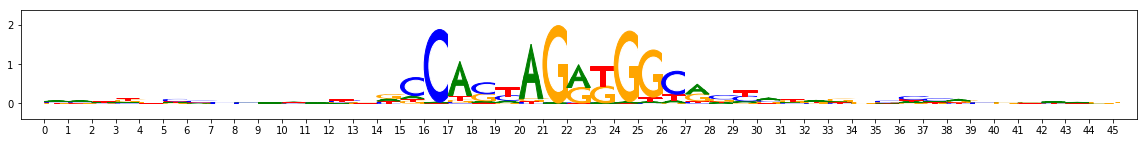

pattern_1
total seqlets: 150
Task 0 actual importance scores:


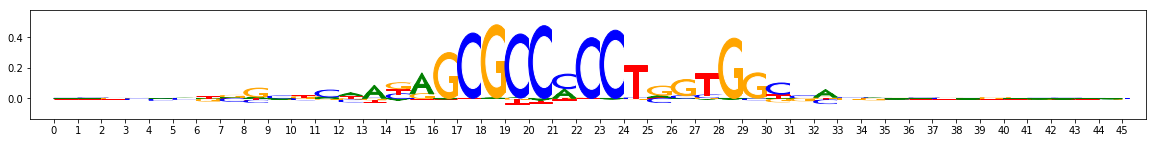

onehot, fwd and rev:


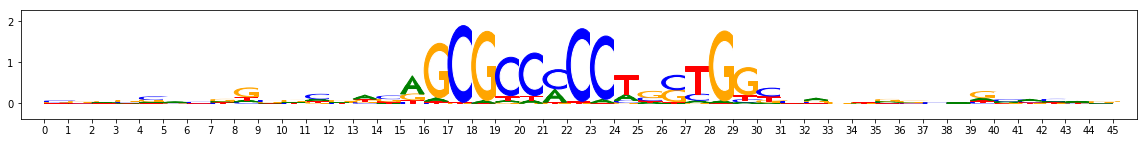

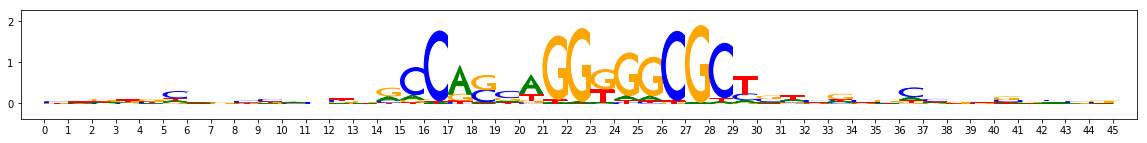

pattern_2
total seqlets: 117
Task 0 actual importance scores:


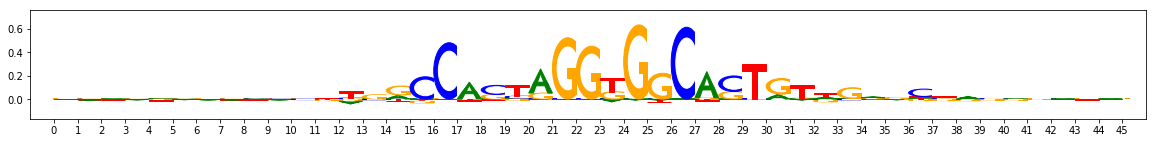

onehot, fwd and rev:


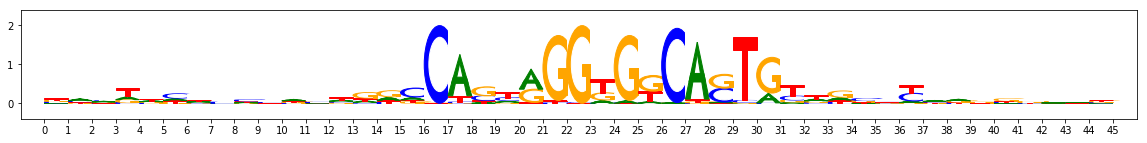

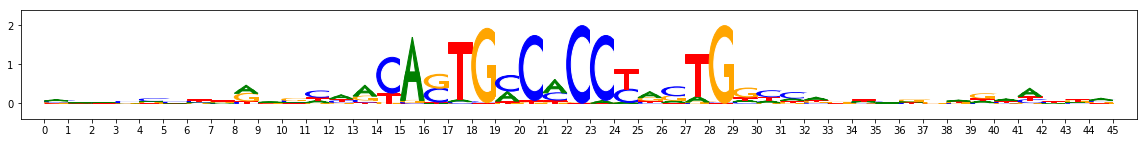

pattern_3
total seqlets: 76
Task 0 actual importance scores:


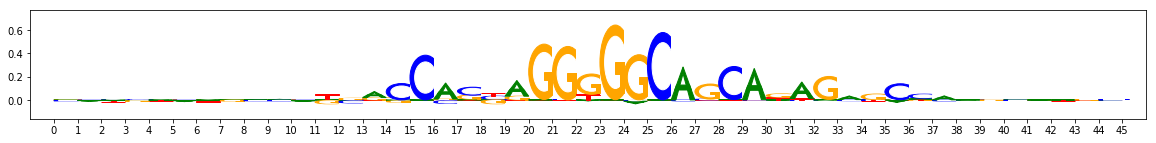

onehot, fwd and rev:


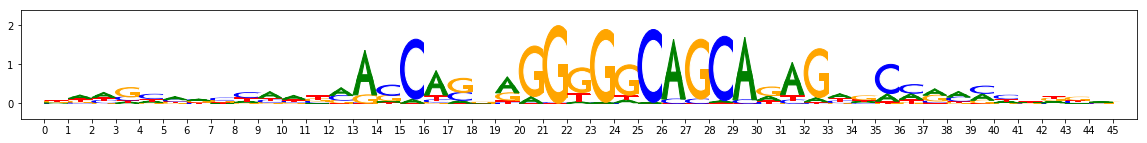

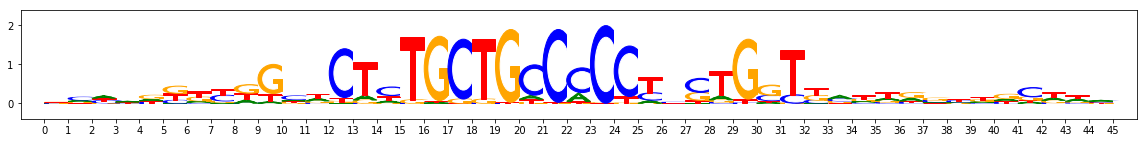

metacluster3
activity pattern: [0 1 0 0 0]
2  patterns:  ['pattern_0', 'pattern_1']
pattern_0
total seqlets: 918
Task 0 actual importance scores:


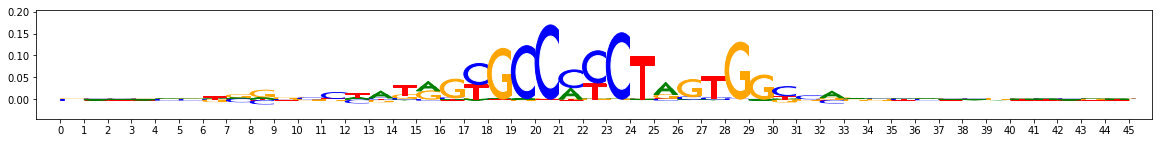

onehot, fwd and rev:


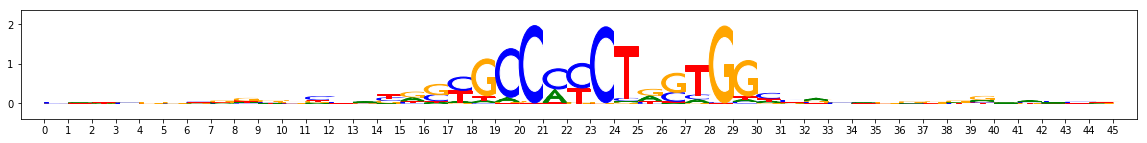

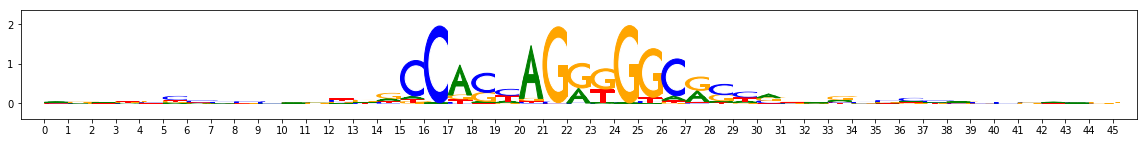

pattern_1
total seqlets: 222
Task 0 actual importance scores:


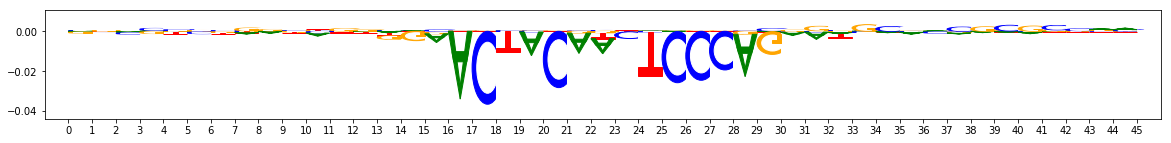

onehot, fwd and rev:


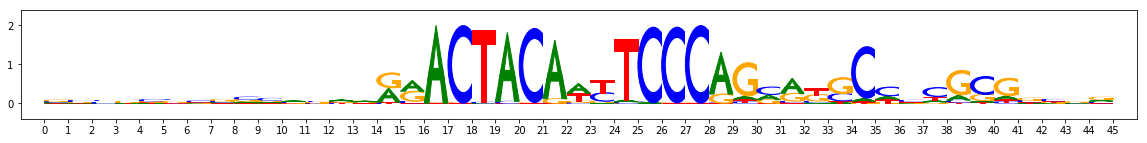

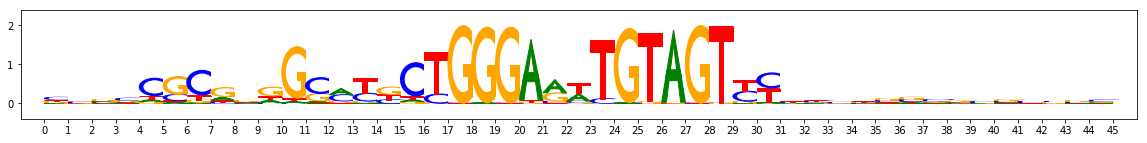

metacluster4
activity pattern: [0 0 0 1 0]
4  patterns:  ['pattern_0', 'pattern_1', 'pattern_2', 'pattern_3']
pattern_0
total seqlets: 273
Task 0 actual importance scores:


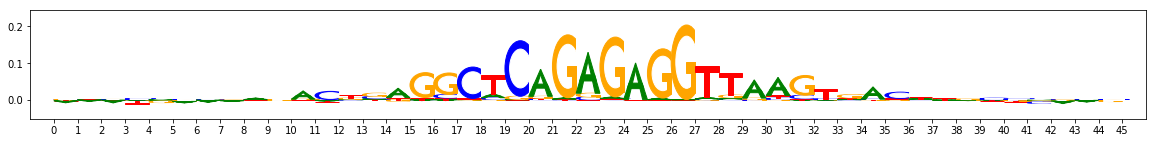

onehot, fwd and rev:


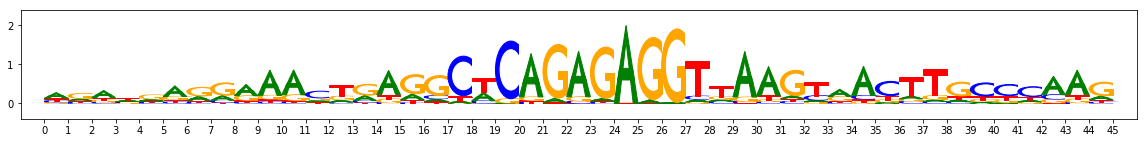

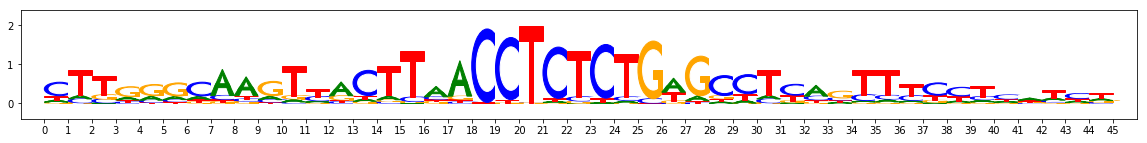

pattern_1
total seqlets: 211
Task 0 actual importance scores:


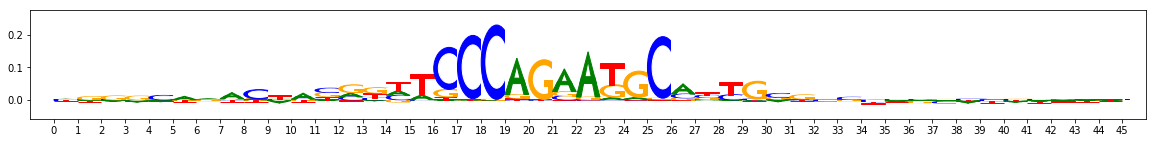

onehot, fwd and rev:


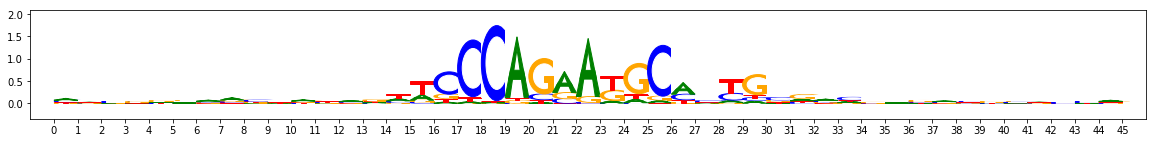

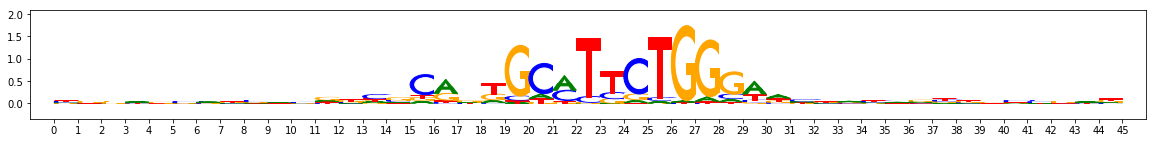

pattern_2
total seqlets: 223
Task 0 actual importance scores:


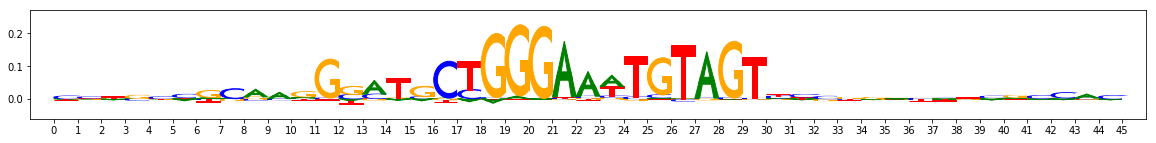

onehot, fwd and rev:


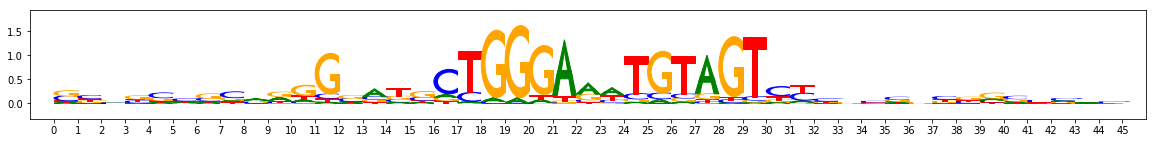

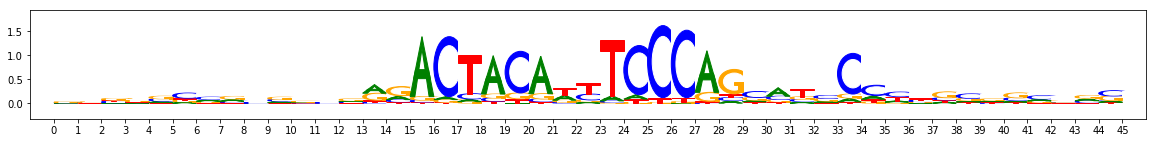

pattern_3
total seqlets: 104
Task 0 actual importance scores:


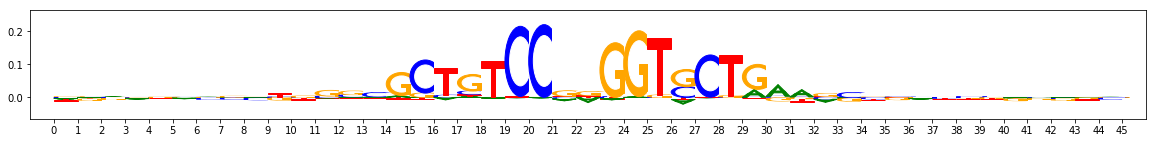

onehot, fwd and rev:


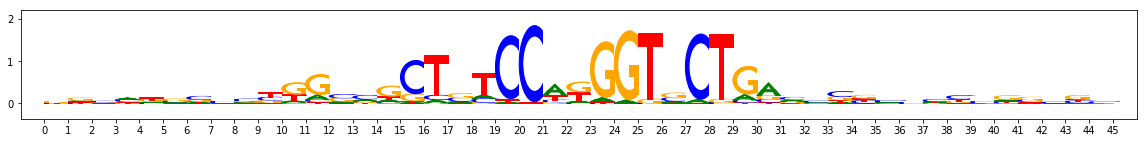

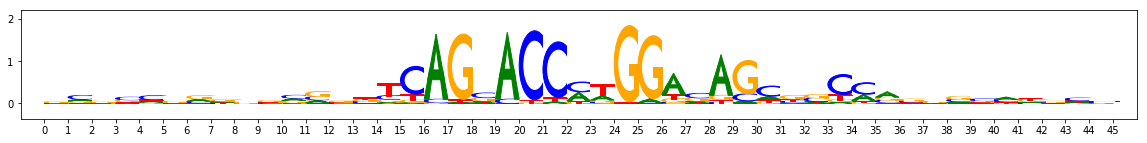

metacluster5
activity pattern: [0 1 1 1 1]
3  patterns:  ['pattern_0', 'pattern_1', 'pattern_2']
pattern_0
total seqlets: 360
Task 0 actual importance scores:


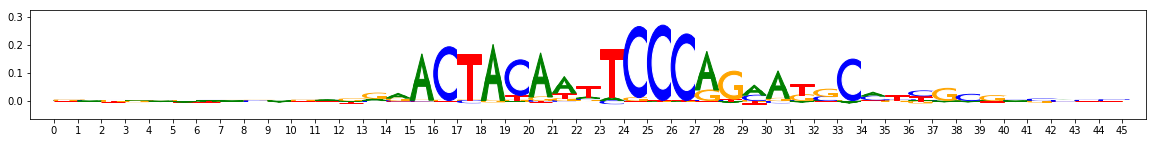

onehot, fwd and rev:


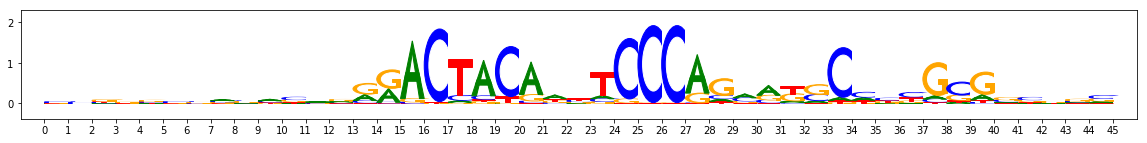

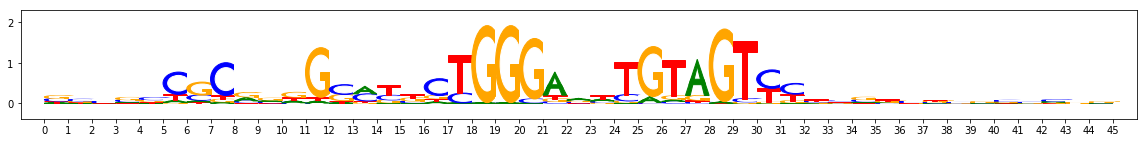

pattern_1
total seqlets: 139
Task 0 actual importance scores:


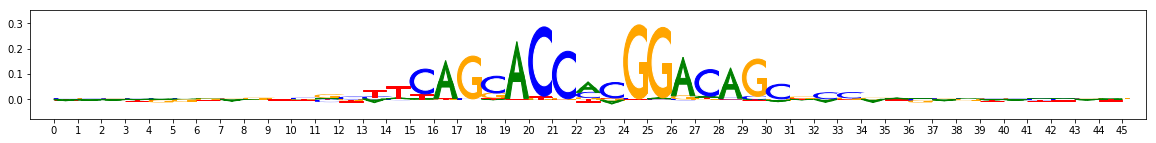

onehot, fwd and rev:


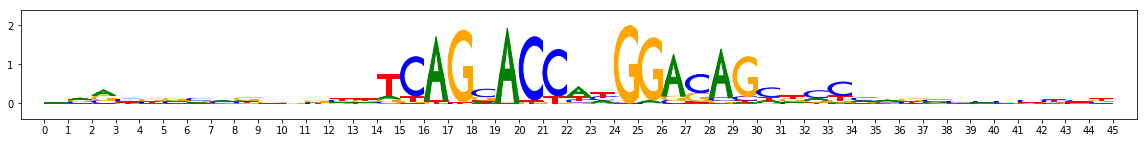

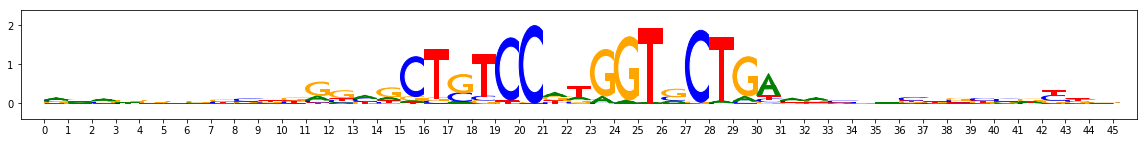

pattern_2
total seqlets: 80
Task 0 actual importance scores:


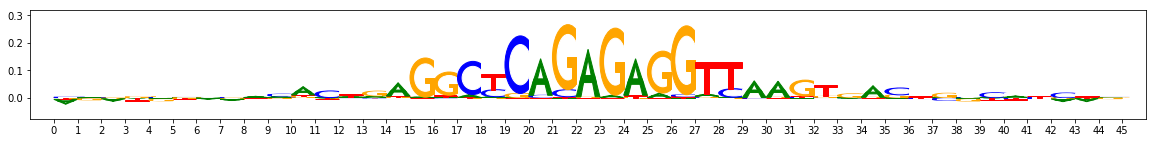

onehot, fwd and rev:


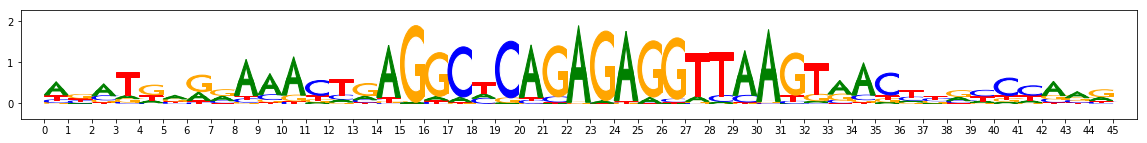

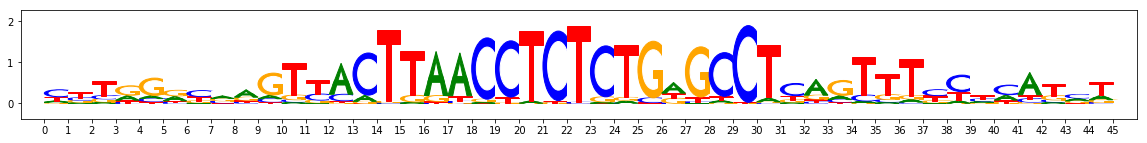

metacluster6
activity pattern: [0 1 0 1 0]
2  patterns:  ['pattern_0', 'pattern_1']
pattern_0
total seqlets: 342
Task 0 actual importance scores:


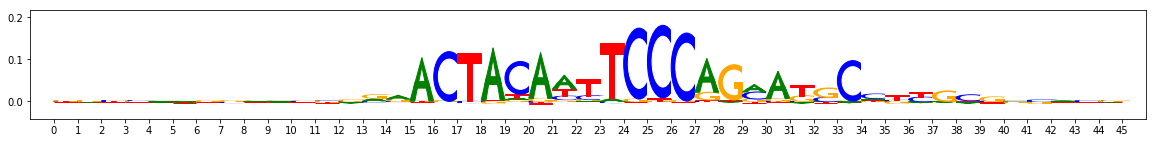

onehot, fwd and rev:


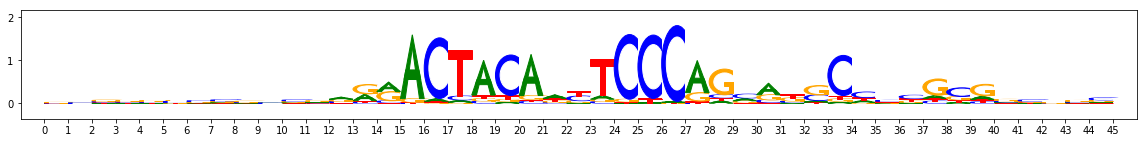

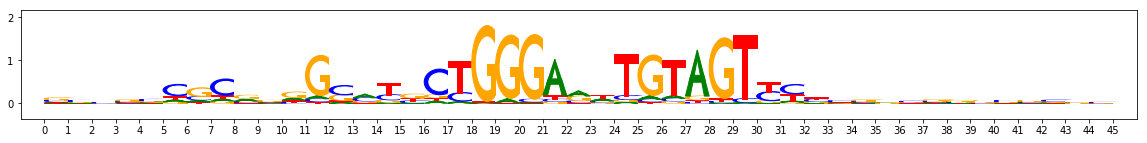

pattern_1
total seqlets: 174
Task 0 actual importance scores:


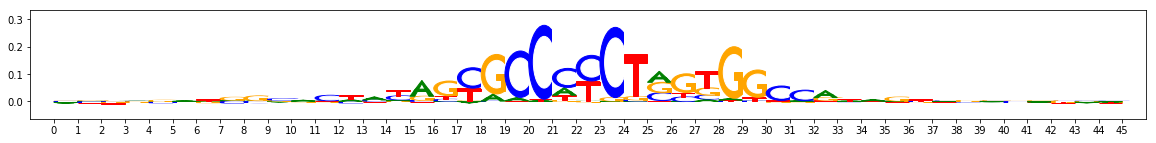

onehot, fwd and rev:


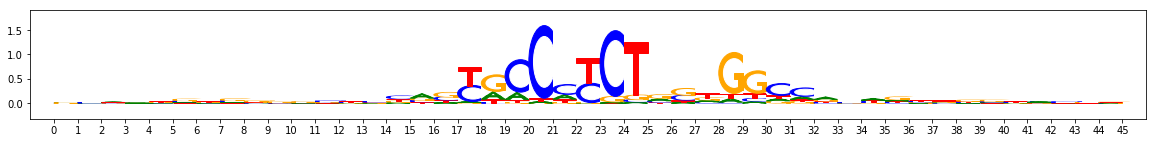

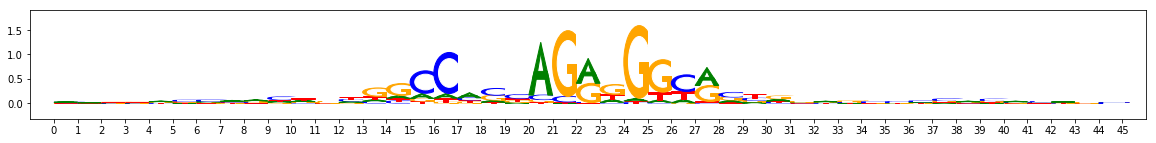

metacluster7
activity pattern: [0 1 0 1 1]
1  patterns:  ['pattern_0']
pattern_0
total seqlets: 165
Task 0 actual importance scores:


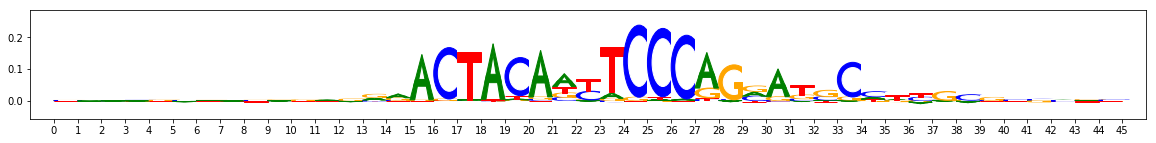

onehot, fwd and rev:


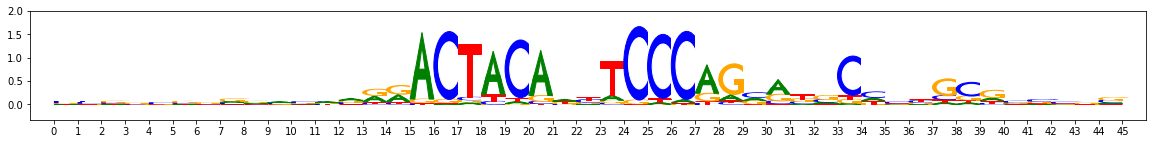

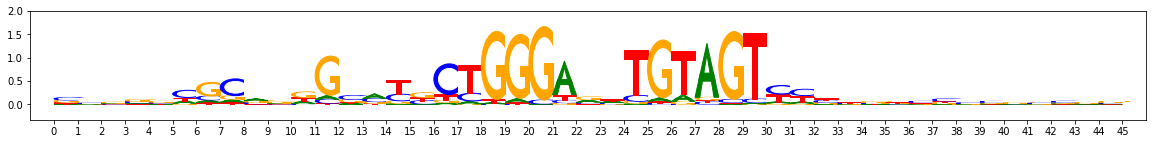

metacluster8
activity pattern: [0 0 0 1 1]
0  patterns:  []


In [7]:
import h5py

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5")
print(hdf5_results)

metacluster_names = list(hdf5_results["metaclustering_results"]["all_metacluster_names"][:])

print(len(metacluster_names), " metaclusters: ", metacluster_names)

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = (list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:]))
    print(len(all_pattern_names), " patterns: ", all_pattern_names)
    
    for pattern_name in all_pattern_names:
        print(pattern_name)
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        #print("Task 0 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()